In [1]:
#prep
import pandas as pd
import numpy 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/Users/jinli/Downloads/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
df.shape

(9134, 24)

In [8]:
df['Engaged']=df['Response'].apply(lambda x: 1 if x== 'Yes' else 0 )
df['Engaged']

0       0
1       0
2       0
3       0
4       0
       ..
9129    0
9130    1
9131    0
9132    0
9133    0
Name: Engaged, Length: 9134, dtype: int64

In [10]:
#data analysis
list(df.columns)

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size',
 'Engaged']

In [14]:
#engagement rate
engagement_rate=df['Engaged'].sum()/df['Engaged'].count()*100.0
print(engagement_rate,df['Engaged'].sum(),df['Engaged'].count())

14.320122618786948 1308 9134


In [23]:
#engagement rate distributed in sales chanel

engagement_by_sales_channel_df = pd.pivot_table(df, values='Engaged', index='Sales Channel', columns='Response', aggfunc=len
).fillna(0.0)
engagement_by_sales_channel_df

Response,No,Yes
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


<function matplotlib.pyplot.show(*args, **kw)>

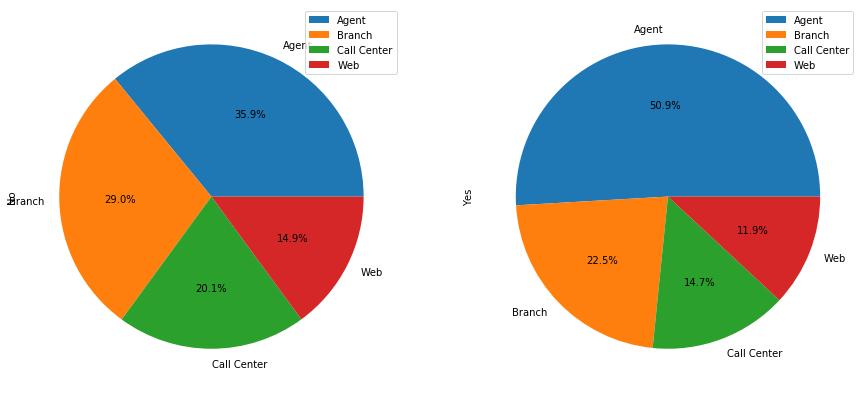

In [31]:
engagement_by_sales_channel_df.plot(
kind ='pie',
figsize=(15,7),
subplots=True,
autopct=lambda x: '%0.1f%%' % x
    
)
plt.show

In [43]:
engagement_by_sales_channel_df['Yes']/(engagement_by_sales_channel_df['No']+engagement_by_sales_channel_df['Yes'])*100.0

Sales Channel
Agent          19.154443
Branch         11.453058
Call Center    10.878187
Web            11.773585
dtype: float64

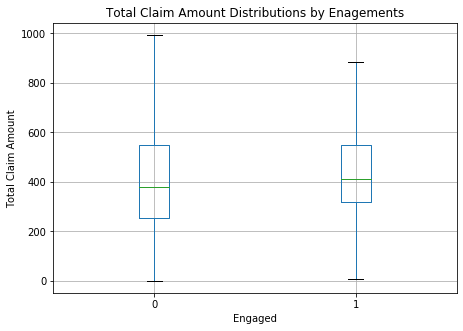

In [54]:
#Total Claim Amount Distributions
ax = df[['Engaged', 'Total Claim Amount']].boxplot(
    by='Engaged',
    showfliers=False,
    figsize=(7,5)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Enagements')

plt.suptitle("")
plt.show()


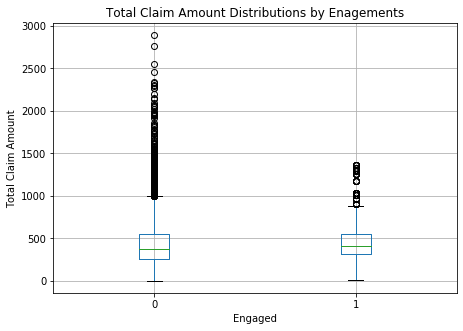

In [64]:
ax = df[['Engaged', 'Total Claim Amount']].boxplot(
    by='Engaged',
    showfliers=True,
    figsize=(7,5)
)
#showfliers > if show outliers
ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Enagements')

plt.suptitle("")
plt.show()

In [65]:
df.groupby('Engaged').describe()['Total Claim Amount'].T

Engaged,0,1
count,7826.000000,1308.000000
mean,432.084497,446.080868
std,297.815881,241.906812
min,0.099007,7.345946
25%,253.236319,316.800000
50%,377.083630,410.120119
75%,550.092193,547.200000
max,2893.239678,1358.400000


In [95]:
#3. Regression Analysis with Continuous Variables Only

In [72]:
df.describe()
#to get continuous variables

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [96]:
import statsmodels.api as sm
#logistic regression model

In [97]:
continuous_vars = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 
    'Months Since Last Claim', 'Months Since Policy Inception', 
    'Number of Open Complaints', 'Number of Policies', 
    'Total Claim Amount'
]
df[continuous_vars]

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [106]:
logit = sm.Logit(df['Engaged'], df[continuous_vars])

In [107]:
logit_fit= logit.fit()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


In [108]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Wed, 16 Dec 2020   Pseudo R-squ.:                -0.02546
Time:                        17:07:15   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

In [110]:
#4.Regression Analysis with Categorical Variables

In [114]:
##- Different ways to handle categorical variables
###1. factorize
labels, levels = df['Education'].factorize()
print(labels)
print(levels)

[0 0 0 ... 0 1 1]
Index(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'], dtype='object')


In [121]:
###2. pandas' Categorical variable series
categories = pd.Categorical(
    df['Education'], 
    categories=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']
)
categories

[Bachelor, Bachelor, Bachelor, Bachelor, Bachelor, ..., Bachelor, College, Bachelor, College, College]
Length: 9134
Categories (5, object): [High School or Below, Bachelor, College, Master, Doctor]

In [122]:
categories.codes

array([1, 1, 1, ..., 1, 2, 2], dtype=int8)

In [123]:
categories.categories

Index(['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'], dtype='object')

In [130]:
gender_values, gender_labels = df['Gender'].factorize()
df['GenderFactorized'] = gender_values
print(gender_values)
gender_labels

[0 0 0 ... 1 1 1]


Index(['F', 'M'], dtype='object')

In [125]:
Education_values, Education_labels = df['Education'].factorize()
df['EducationFactorized'] = Education_values
Education_values

array([0, 0, 0, ..., 0, 1, 1])

In [126]:

logit = sm.Logit(
    df['Engaged'], 
    df[[
        'GenderFactorized',
        'EducationFactorized'
    ]]
)

In [127]:
logit_fit=logit.fit()

Optimization terminated successfully.
         Current function value: 0.489140
         Iterations 6


In [128]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Wed, 16 Dec 2020   Pseudo R-squ.:                 -0.1909
Time:                        17:31:18   Log-Likelihood:                -4467.8
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
GenderFactorized       -1.1269      0.046    -24.263      0.000      -1.218      -1.036
EducationFactorized    -0.5536      0.018    -30.560      0.000      -0.589      -0.518
=======================================================================================
"""

In [131]:
#5. Regression Analysis with Both Continuous and Categorical Variables

In [137]:
logit = sm.Logit(
    df['Engaged'], 
    df[['Customer Lifetime Value',
        'Income',
        'Monthly Premium Auto',
        'Months Since Last Claim',
        'Months Since Policy Inception',
        'Number of Open Complaints',
        'Number of Policies',
        'Total Claim Amount',
        'GenderFactorized',
        'EducationFactorized'
    ]]
)

In [138]:
logit_fit=logit.fit()

Optimization terminated successfully.
         Current function value: 0.420108
         Iterations 6


In [139]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9124
Method:                           MLE   Df Model:                            9
Date:                Wed, 16 Dec 2020   Pseudo R-squ.:                -0.02283
Time:                        17:40:29   Log-Likelihood:                -3837.3
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.625e-06   5.02e-06     -1.319      0.187   -1.65e-05    3.22e-06
Income                        -2.275e-06   1.04e-06     -2.188      0.029   -4.31e-06   -2.37e-07
Monthly Premium Auto             -0.0077      0.001     -6.343      0.000      -0.010      -0.005
Months Since Last Claim          -0.0186      0.003     -6.627      0.000      -0.024      -0.013
Months Since Policy Inception    -0.0054      0.001     -5.559      0.000      -0.007      -0.004
Number of Open Complaints        -0.0811      0.034     -2.375      0.018      -0.148      -0.014
Number of Policies               -0.0751      0.013     -5.888      0.000      -0.100      -0.050
Total Claim Amount                0.0002      0.000      1.173      0.241      -0.000       0.000
GenderFactorized                 -0.1421      0.058     -2.458      0.014      -0.255      -0.029
EducationFactorized              -0.0801      0.022     -3.570      0.000      -0.124      -0.036
=================================================================================================
"""